Импорт библиотек

In [12]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

import re
import codecs

from permute.core import two_sample
from arch.bootstrap import IIDBootstrap

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# Анна Каренина на разных языках

Создадим списки слов романа для каждого языка

In [25]:
def words(pathToFile):
    text = open(pathToFile, 'r', encoding="utf-8").read().lower()
    
    words = re.sub("[^\w'’]", " ",  text).split()
    
    return words

In [29]:
words_ru = words('./ak_ru.txt')
words_en = words('./ak_en.txt')
words_fr = words('./ak_fr.txt')

Посчитаем количество слов по длинам для каждого языка

In [31]:
def counts(words):
    counts = {}
    for word in words:
        if (counts.get(len(word)) == None):
            counts[len(word)] = 1
        else:
            counts[len(word)] += 1
            
    return counts

In [35]:
counts_ru = counts(words_ru)
counts_en = counts(words_en)
counts_fr = counts(words_fr)

Посмотрим на распределение количества слов по длинам

In [60]:
def lengths(counts):
    lengths = []
    for key, value in counts.items():
        for i in range(0, value):
            lengths.append(key)
    
    return lengths

In [65]:
lengths_ru = lengths(counts_ru)
lengths_en = lengths(counts_en)
lengths_fr = lengths(counts_fr)

Так как количество слов на разных языках разное, то следует отнормировать данные

In [71]:
lengths_ru = lengths_ru / np.sum(lengths_ru)
lengths_en = lengths_en / np.sum(lengths_en)
lengths_fr = lengths_fr / np.sum(lengths_fr)

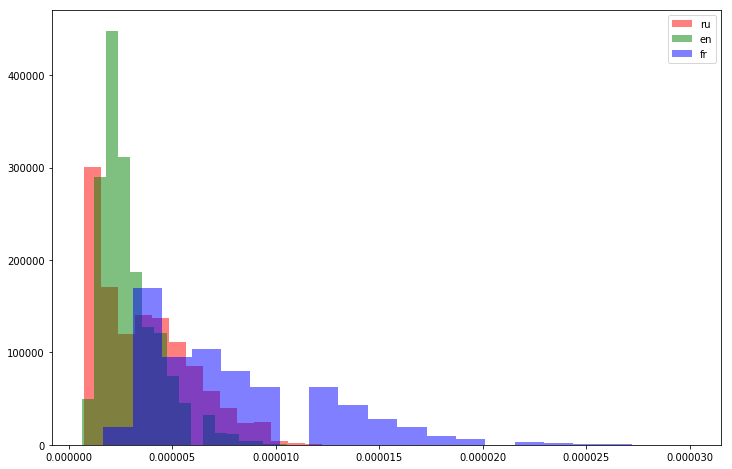

In [72]:
_ = plt.hist(lengths_ru, bins = 20, color = 'r', alpha = 0.5, density = True, label = 'ru')
_ = plt.hist(lengths_en, bins = 20, color = 'g', alpha = 0.5, density = True, label = 'en')
_ = plt.hist(lengths_fr, bins = 20, color = 'b', alpha = 0.5, density = True, label = 'fr')
_ = plt.legend(loc = 'best')